# PREGUNTAS A RESPONDER 
* Provincias minimas y maximas en ganancias.
* resumen estadistico de CABA(capital), predecir a futuro sus ganancias y eficacia del modelo. 
* relacion entre las 2 provincias que mas generan ingresos.
* las provincias que mas generaron el ultimo trimestre, con sus estadisticas y modelos creados para predicciones futuras con su respectiva eficacia del modelo.


# RESPUESTAS
* **RESUMEN**
    * todos tienen valor asimetricos crecientes, es decir que van creciendo sus valores cada 3 meses (sea por inflacion o no). Como observamos la frecuencia fue creciendo paulatinamente, excepcion en el ultimo trimestre del 2008 que casualmente estuvo la crisis mundial, llamada "la crisis bursatil" e hizo que todas las provincias tengan perdidas, pero de ahi en mas tuvo una remontada muy fuerte y creciente hasta el primer trimeste del 2012 que fue donde se aplano un poco mas las ganancias.

--- 
* **CABA**
    * la distribucion normal es =  0.9586011505066677
    * valor en la tabla de distribucion normal 0.8289
    * la probabilidad de CABA sea menor a la MAXIMA trimestral es = % 82.89
    * la probabilidad de que supere la MAXIMA trimestral es = % 17.11
 
----
* **PROVINCIAS CON MAYORES Y MENORES ACTIVIDADES ECONOMICAS TRIMESTRALES**
    * La 2 provincias que **mas generan ingresos** son (separando el sector privado que genera el CUADRUPLE de las 2 provincias principales y genera hasta 13 veces mas comparando con las otras provincias).
    * **total_sector_privado = 5948.211132**
    * **Caba = 1524.920947**
    * **Prov_BsAs = 1867.577658**


* Estas son las provincias que **menos generan ingresos** y su respectivas media de ingreso.
    * **Formosa = 23.512447**
    * **la_rioja = 29.447316**
    * **catamarca = 31.308868**
    * **tierra_fuego = 33.463868**

---
* **En la linea 32 tenemos la recta de REGRESION y PREDICCION para CABA Y PROV explicada graficamente**
    * La prediccion del modelo creado tiene una eficacia del %89,51

---
* **En la linea 107 en adelante tenemos explicado el modelo de las pronvicias con mas ganancias economicas y su futura predicciones**
    * la prediccion del modelo creado tiene una eficacia del %95.75

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

# LIMPIEZA DE DATOS

In [34]:
#carga de dataset y modificacion nombre de alguna columna
data = pd.read_csv("../MisPracticas/Datasets/puestos-trabajo-por-sector-actividad-economica-trimestral-en-miles.csv")
data = data.rename(columns={"provincia_buenos_aires":"prov_BsAs"})
data.tail()

,indice_tiempo,total_sector_privado,caba,prov_BsAs,catamarca,cordoba,corrientes,chaco,chubut,entre_rios,...,rio_negro,salta,san_juan,san_luis,santa_cruz,santa_fe,santiago_estero,tierra_fuego,tucuman,sin_clasificar
33,2014-04-01,6316.278,1571.103,1993.763,33.063,509.139,72.299,76.045,98.337,138.587,...,108.473,113.537,84.960,59.502,63.227,515.361,53.973,39.760,164.156,0.0
34,2014-07-01,6320.227,1575.669,1987.301,32.383,508.233,72.887,76.700,100.061,140.163,...,109.632,116.762,84.069,59.746,62.686,515.113,53.262,40.573,169.980,0.0
35,2014-10-01,6396.472,1589.255,2013.862,32.975,511.113,73.895,76.702,103.402,146.243,...,111.599,123.951,85.235,60.724,64.213,520.063,52.162,41.061,164.613,0.0
36,2015-01-01,6467.690,1594.088,2043.540,33.736,515.780,74.263,76.077,103.806,140.426,...,122.405,125.886,87.031,63.477,64.834,517.405,51.893,38.998,159.709,NaN
37,2015-04-01,6490.746,1605.008,2038.838,34.191,515.506,76.319,78.872,102.138,142.073,...,114.745,120.845,87.085,65.732,64.712,525.751,53.059,40.647,173.198,NaN


In [33]:
data.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


total_sector_privado    5948.211132
caba                    1524.920947
prov_BsAs               1867.577658
catamarca                 31.308868
cordoba                  480.674132
corrientes                67.650974
chaco                     64.686158
chubut                    95.077842
entre_rios               129.748763
formosa                   23.512447
jujuy                     51.560184
la_pampa                  36.128947
la_rioja                  29.447316
mendoza                  222.533211
misiones                  94.453342
neuquen                   93.153447
rio_negro                100.822763
salta                     97.125816
san_juan                  79.891053
san_luis                  55.714868
santa_cruz                56.920684
santa_fe                 486.436395
santiago_estero           45.582000
tierra_fuego              33.463868
tucuman                  153.493553
sin_clasificar            27.788611
dtype: float64

In [35]:
data.shape

(38, 27)

In [36]:
data_columns = data.columns.values
data_columns

array(['indice_tiempo', 'total_sector_privado', 'caba', 'prov_BsAs',
       'catamarca', 'cordoba', 'corrientes', 'chaco', 'chubut',
       'entre_rios', 'formosa', 'jujuy', 'la_pampa', 'la_rioja',
       'mendoza', 'misiones', 'neuquen', 'rio_negro', 'salta', 'san_juan',
       'san_luis', 'santa_cruz', 'santa_fe', 'santiago_estero',
       'tierra_fuego', 'tucuman', 'sin_clasificar'], dtype=object)

In [37]:
data_caba = data.caba.values
data_caba

array([1279.692, 1307.624, 1335.681, 1381.831, 1404.666, 1438.034,
       1463.837, 1495.535, 1507.651, 1545.664, 1556.327, 1559.693,
       1517.619, 1501.964, 1500.046, 1513.898, 1519.83 , 1526.244,
       1538.767, 1564.606, 1564.843, 1575.564, 1587.643, 1600.174,
       1591.317, 1580.561, 1572.169, 1586.763, 1581.939, 1573.346,
       1576.303, 1587.278, 1574.764, 1571.103, 1575.669, 1589.255,
       1594.088, 1605.008])

array([[<AxesSubplot:title={'center':'total_sector_privado'}>,
        <AxesSubplot:title={'center':'caba'}>,
        <AxesSubplot:title={'center':'prov_BsAs'}>,
        <AxesSubplot:title={'center':'catamarca'}>,
        <AxesSubplot:title={'center':'cordoba'}>],
       [<AxesSubplot:title={'center':'corrientes'}>,
        <AxesSubplot:title={'center':'chaco'}>,
        <AxesSubplot:title={'center':'chubut'}>,
        <AxesSubplot:title={'center':'entre_rios'}>,
        <AxesSubplot:title={'center':'formosa'}>],
       [<AxesSubplot:title={'center':'jujuy'}>,
        <AxesSubplot:title={'center':'la_pampa'}>,
        <AxesSubplot:title={'center':'la_rioja'}>,
        <AxesSubplot:title={'center':'mendoza'}>,
        <AxesSubplot:title={'center':'misiones'}>],
       [<AxesSubplot:title={'center':'neuquen'}>,
        <AxesSubplot:title={'center':'rio_negro'}>,
        <AxesSubplot:title={'center':'salta'}>,
        <AxesSubplot:title={'center':'san_juan'}>,
        <AxesSubplot:title={

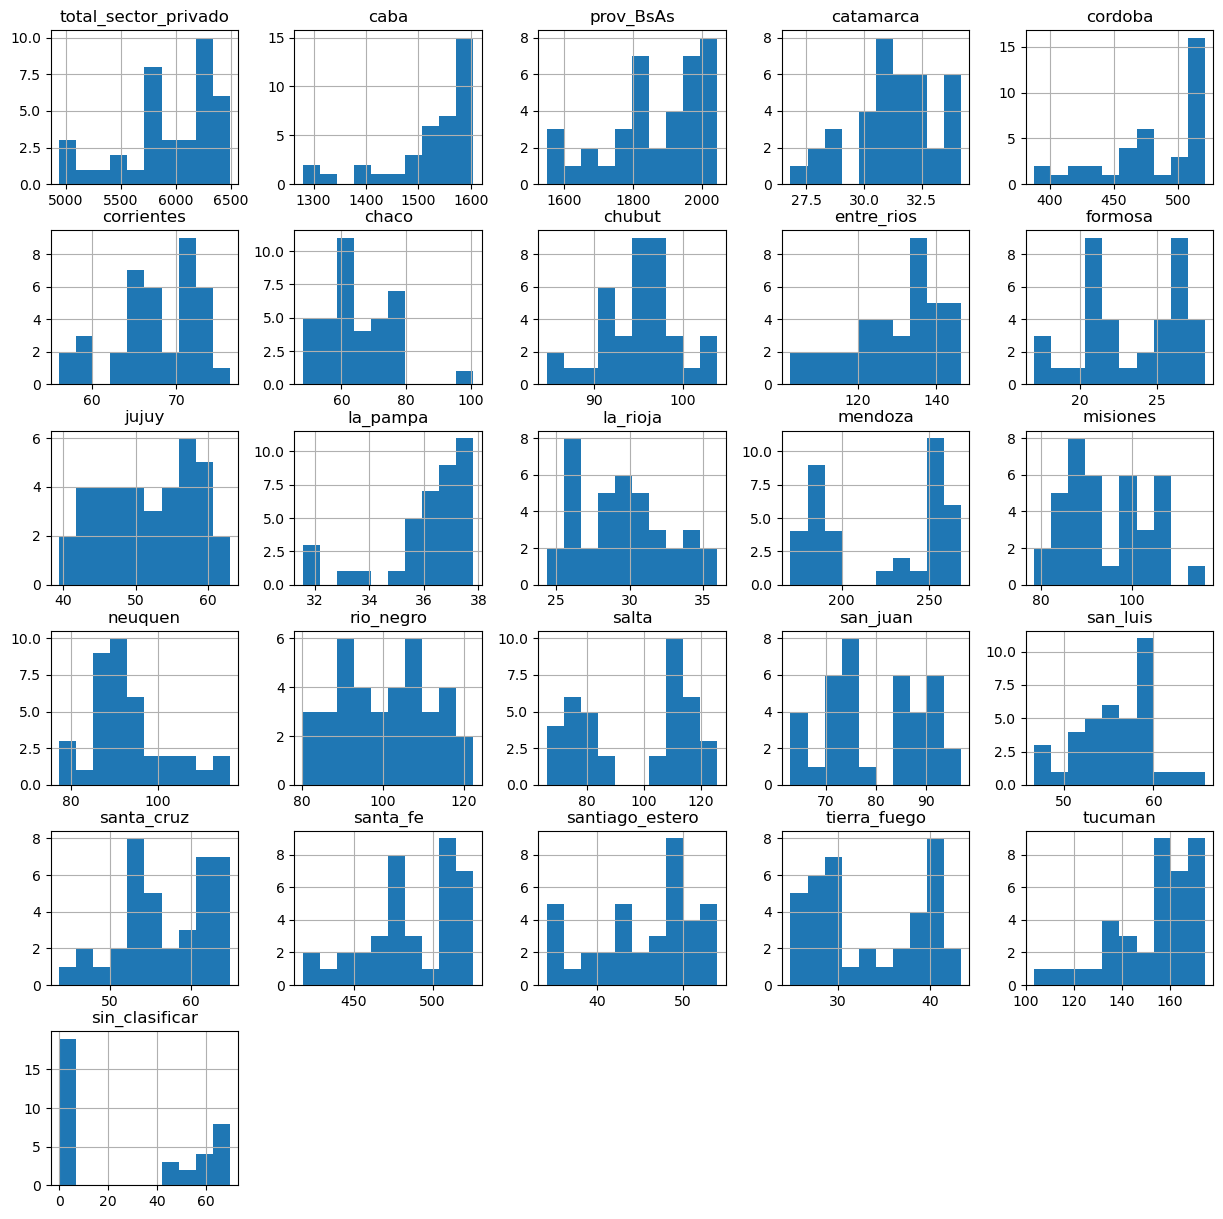

In [38]:
data.hist(figsize=(15, 15))

Text(0, 0.5, 'Veces de la actividada economica')

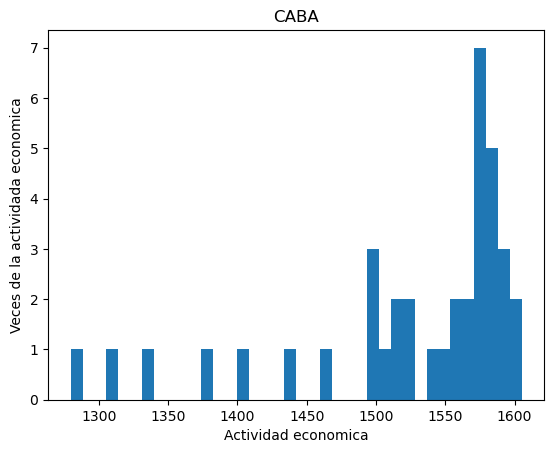

In [39]:
k = int(np.ceil(1+np.log2(3333)))

plt.hist(data["caba"], bins=38)
plt.title("CABA")
plt.xlabel("Actividad economica")
plt.ylabel("Veces de la actividada economica")

Text(0, 0.5, 'Veces de la actividada economica')

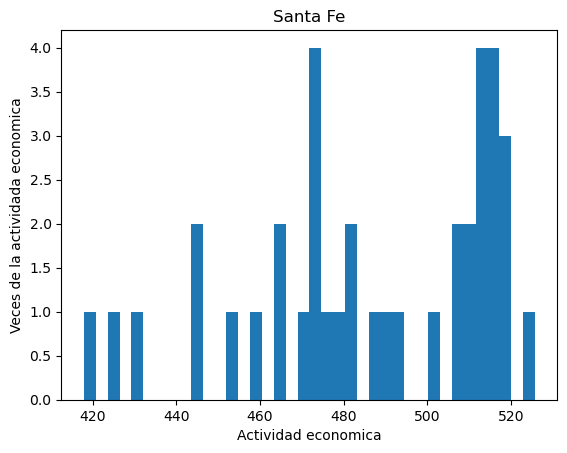

In [40]:
k = int(np.ceil(1+np.log2(3333)))

plt.hist(data["santa_fe"], bins=38)
plt.title("Santa Fe")
plt.xlabel("Actividad economica")
plt.ylabel("Veces de la actividada economica")

Text(0.5, 1.0, 'CABA')

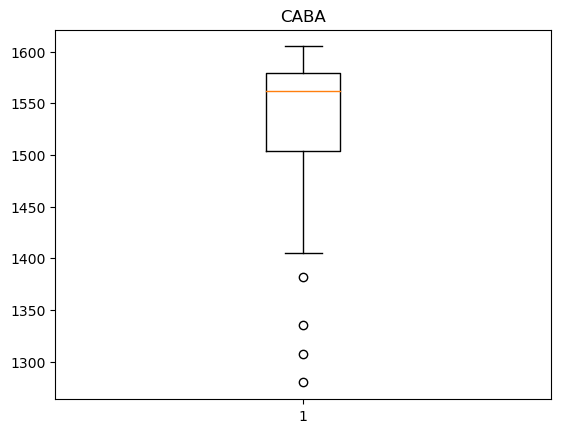

In [41]:
plt.boxplot(data["caba"])
plt.title("CABA")

* la caja indica la importancia dónde está la gran mayoria de los datos, la parte de abajo representa el minimo y la parte arriba de la caja representa el maximo (son los cuantiles entre el 25% y 75%)
* donde empieza la caja seria el 25% despues de estar ordenado, el borde superior seria el percentil 75% y donde esta trazada la linea dentro del box seria el 50% exacto (la moda)
* El 75% - 25 % en nuestro caso: 1579.496500 - 1503.385750 = 76.11075000000005 seria el rango interquartilico (IQR:inter quartil range), seria el tamañao de la caja.
* los bigotes, lo que sobre sale de la caja se coloca 1.5 veces del rango interquartilico tanto hacia arriba y hacia abajo todo lo que supere ese 1.5 son "OUTLAYER" la bolitas 

Text(0, 0.5, 'Veces de la actividada economica')

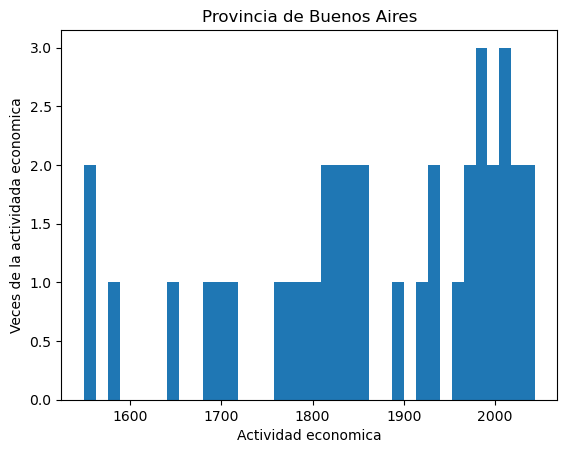

In [42]:
k = int(np.ceil(1+np.log2(3333)))

plt.hist(data["prov_BsAs"], bins=38)
plt.title("Provincia de Buenos Aires")
plt.xlabel("Actividad economica")
plt.ylabel("Veces de la actividada economica")

Text(0, 0.5, 'Veces de la actividada economica')

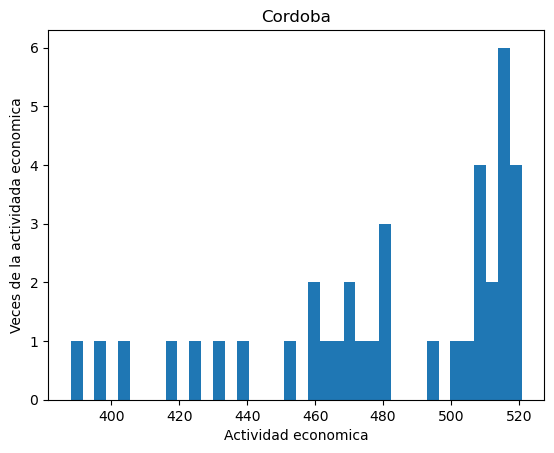

In [43]:
k = int(np.ceil(1+np.log2(3333)))

plt.hist(data["cordoba"], bins=38)
plt.title("Cordoba")
plt.xlabel("Actividad economica")
plt.ylabel("Veces de la actividada economica")

Text(0, 0.5, 'Veces de la actividada economica')

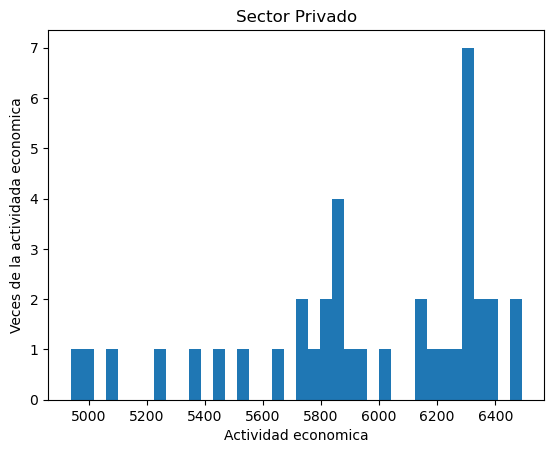

In [44]:
plt.hist(data["total_sector_privado"], bins=38)
plt.title("Sector Privado")
plt.xlabel("Actividad economica")
plt.ylabel("Veces de la actividada economica")

* La distribución normal sirve para conocer la probabilidad de encontrar un valor de la variable que sea igual o inferior a un cierto valor , conociendo la media, la desviación estándar, y la varianza de un conjunto de datos en sustituyéndolos en la función que describe el modelo.

-----

# Aca mostraremos la frecuencia de las 4 ciudades mas importantes con mas ganancias a lo largo de los años 

<AxesSubplot:xlabel='indice_tiempo'>

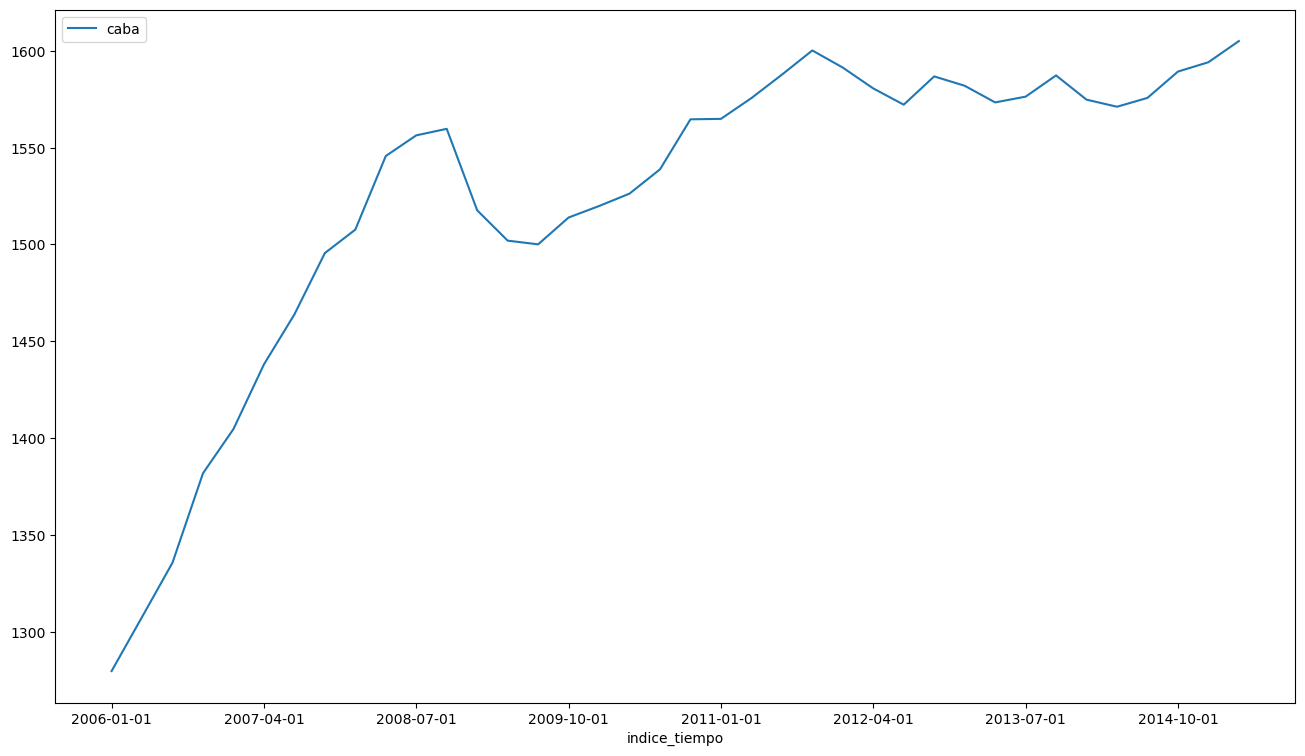

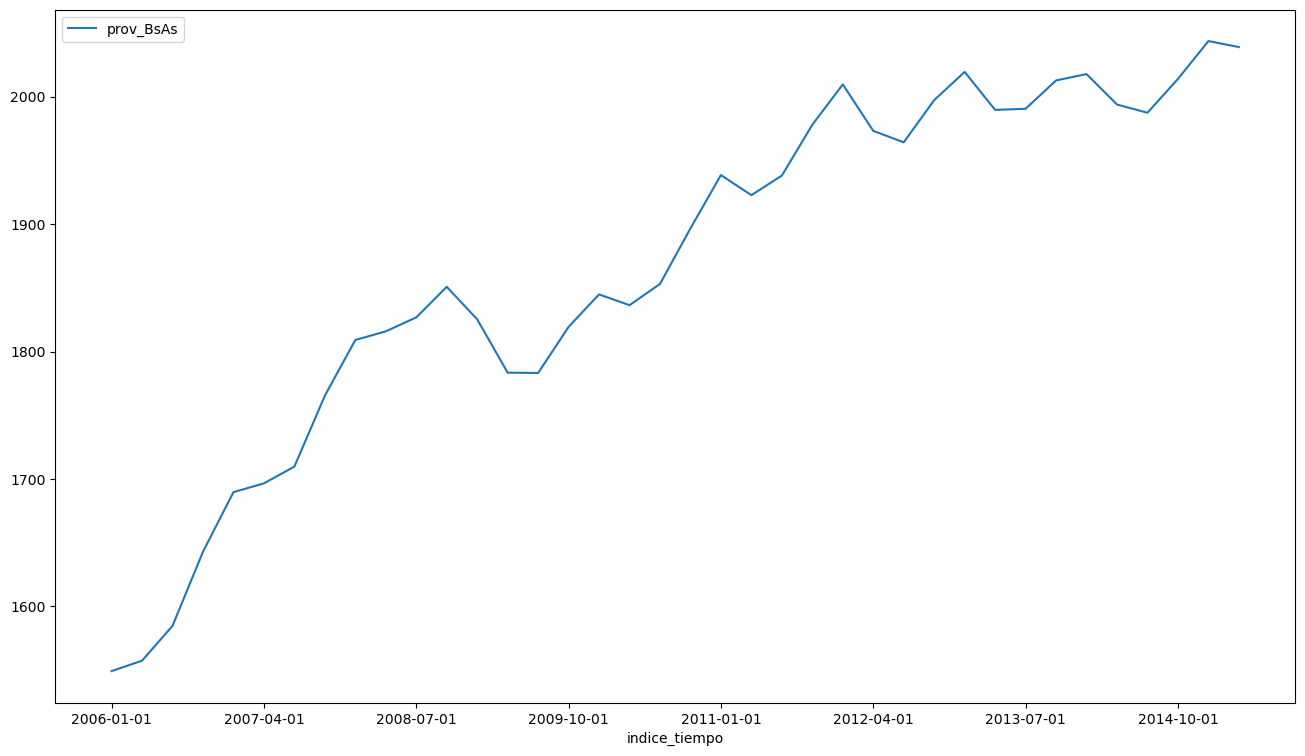

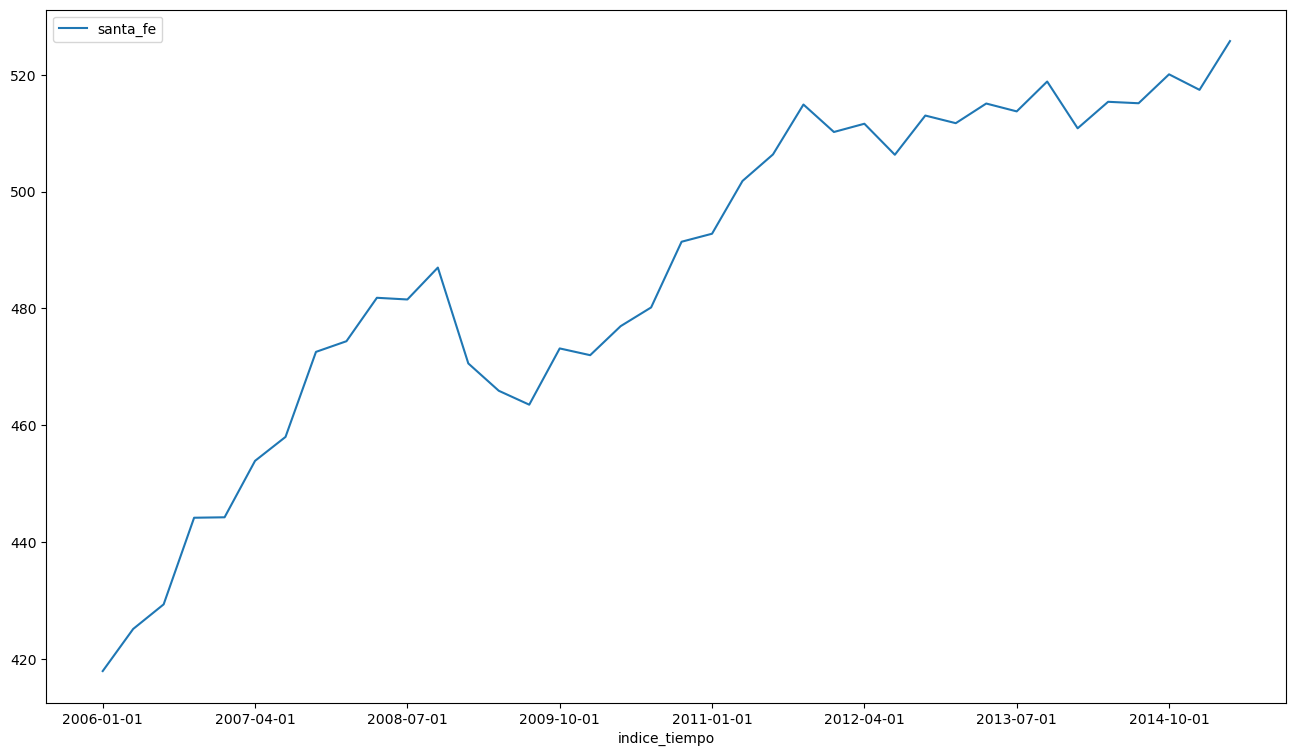

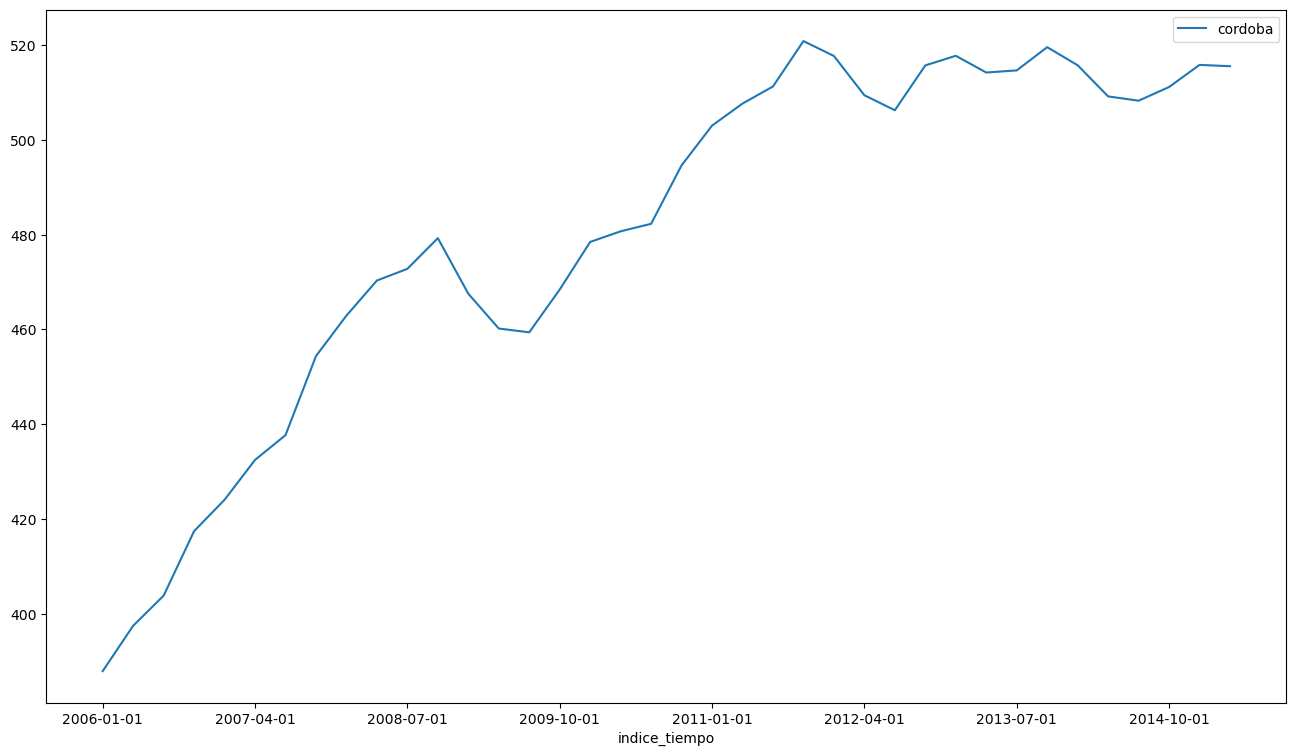

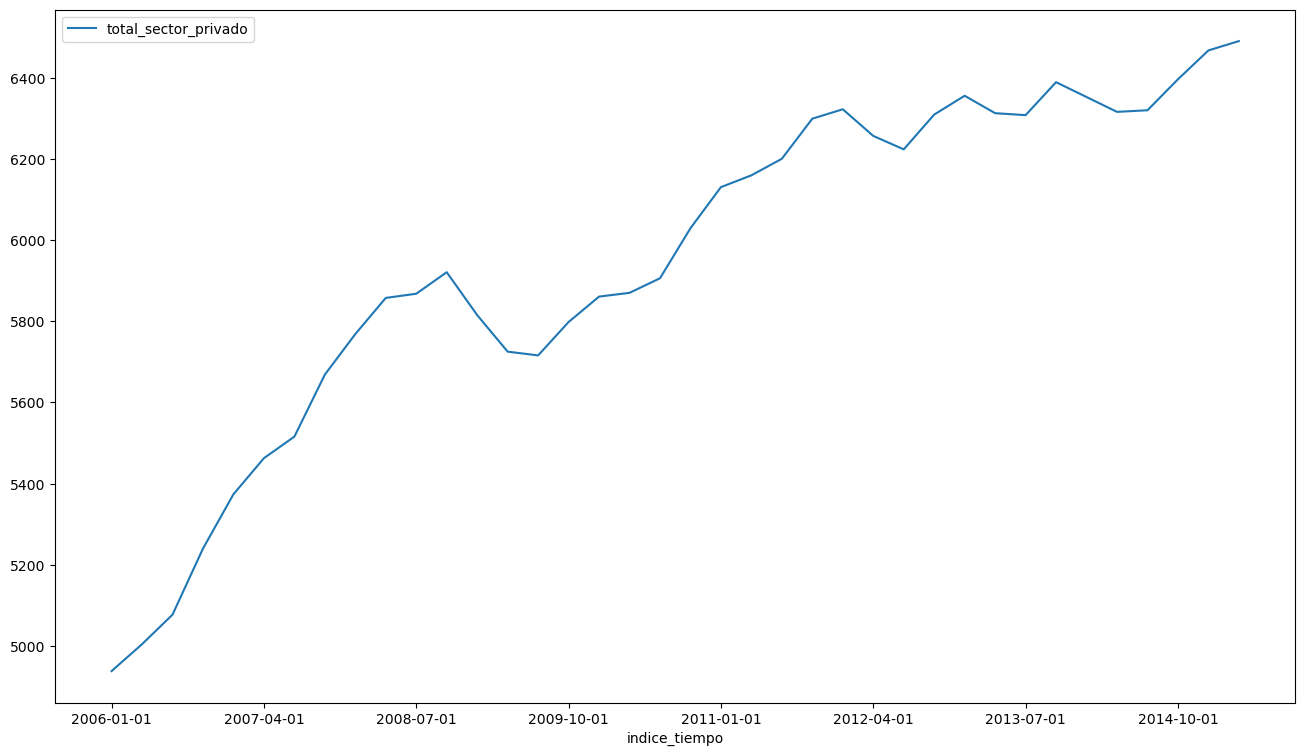

In [45]:
data.plot(x="indice_tiempo", y="caba", figsize=(16,9))
data.plot(x="indice_tiempo", y="prov_BsAs", figsize=(16,9))
data.plot(x="indice_tiempo", y="santa_fe", figsize=(16,9))
data.plot(x="indice_tiempo", y="cordoba", figsize=(16,9))
data.plot(x="indice_tiempo", y="total_sector_privado", figsize=(16,9))

* como podemos ver la frecuencia fue creciendo paulatinamente, excepcion en el ultimo trimestre del 2008 que casualmente estuvo la crisis mundial, "llamada la crisis bursatil"

(array([ 2.,  1.,  0.,  2.,  1.,  1.,  3.,  6.,  7., 15.]),
 array([-2.93526274, -2.54587643, -2.15649013, -1.76710383, -1.37771752,
        -0.98833122, -0.59894491, -0.20955861,  0.17982769,  0.569214  ,
         0.9586003 ]),
 <BarContainer object of 10 artists>)

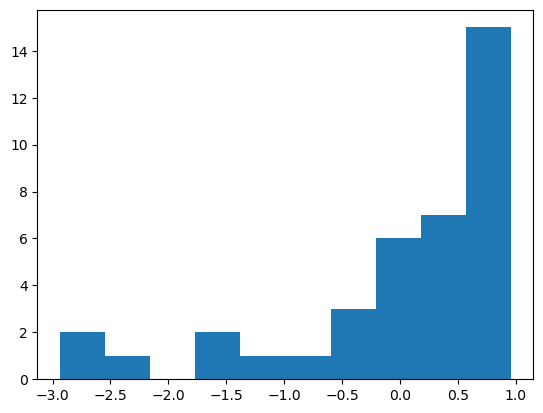

In [46]:
# Hacemos una distribucion normal de "CABA"
x = data["caba"]
mu = 1524.920947
sd = 83.545825
z = (x - mu ) / sd
plt.hist(z)

#plt.hist(sorted(data["caba"]))

# Empezamos a hacer trabajos estadisticos con las provincias que mas generan, en este caso buscamos su  Correlacion 

In [47]:
subset_mini=["total_sector_privado","prov_BsAs","caba","santa_fe","cordoba"]
subset1 = data[subset_mini]
subset1.head()

,total_sector_privado,prov_BsAs,caba,santa_fe,cordoba
0,4937.920,1549.285,1279.692,417.937,387.987
1,5004.270,1557.442,1307.624,425.146,397.546
2,5077.027,1584.780,1335.681,429.355,403.891
3,5239.932,1642.924,1381.831,444.180,417.496
4,5373.789,1689.680,1404.666,444.256,424.108


In [48]:
subset1["corr_BsAs_caba"] = (data["prov_BsAs"] - np.mean(data["prov_BsAs"])) * (data["caba"] - np.mean(data["caba"]))
subset1["corr_caba"] =(subset1["caba"] - np.mean(data["caba"]))**2
subset1["corr_prov_BsAs"] =(subset1["prov_BsAs"] - np.mean(data["prov_BsAs"]))**2
subset1.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\1503866367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1["corr_BsAs_caba"] = (data["prov_BsAs"] - np.mean(data["prov_BsAs"])) * (data["caba"] - np.mean(data["caba"]))
C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\1503866367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1["corr_caba"] =(subset1["caba"] - np.mean(data["caba"]))**2
C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\1503866367.py:3: SettingWithCopyWarning: 
A value is tryi

,total_sector_privado,prov_BsAs,caba,santa_fe,cordoba,corr_BsAs_caba,corr_caba,corr_prov_BsAs
0,4937.920,1549.285,1279.692,417.937,387.987,78054.573451,60137.236627,101310.216070
1,5004.270,1557.442,1307.624,425.146,397.546,67391.531731,47217.963336,96184.126298
2,5077.027,1584.780,1335.681,429.355,403.891,53516.613896,35811.757680,79974.515311
3,5239.932,1642.924,1381.831,444.180,417.496,32145.680084,20474.733038,50469.266005
4,5373.789,1689.680,1404.666,444.256,424.108,21393.073487,14461.252367,31647.576684


* Aca sacamos el cuadrado de las diferencias entre su actividad economica trimestral y su promedio en cada provincia 

In [49]:
#sacaremos la correlacion de pearson

corr_pearson = sum(subset1["corr_BsAs_caba"]) / np.sqrt(sum(subset1["corr_caba"]) * sum(subset1["corr_prov_BsAs"]))
corr_pearson

0.9461074525072471

In [50]:
#CREAMOS UNA FUNCION PARA QUE SEA TODO MAS RAPIDO

def coeficiente_correlacion (df, var1,var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_pearson = sum(df["corrn"]) / np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_pearson

## Distribucion normal 

In [51]:
#Ahora normalizaremos de una simple manera

media_caba = 1524.9209 
max_caba = 1605.0080
std_caba = 83.5458

zz = (max_caba -media_caba)
zz_div = zz / std_caba

print("la distribucion normal es = ",zz_div)
print("valor en la tabla de distribucion normal",0.8289)
print("la probabilidad de CABA sea menor a la MAXIMA trimestral es = %",82.89)
print("y la probabilidad de que supere la MAXIMA trimestral es = %",17.11)

la distribucion normal es =  0.9586011505066677
valor en la tabla de distribucion normal 0.8289
la probabilidad de CABA sea menor a la MAXIMA trimestral es = % 82.89
y la probabilidad de que supere la MAXIMA trimestral es = % 17.11


In [52]:
data.mean()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


total_sector_privado    5948.211132
caba                    1524.920947
prov_BsAs               1867.577658
catamarca                 31.308868
cordoba                  480.674132
corrientes                67.650974
chaco                     64.686158
chubut                    95.077842
entre_rios               129.748763
formosa                   23.512447
jujuy                     51.560184
la_pampa                  36.128947
la_rioja                  29.447316
mendoza                  222.533211
misiones                  94.453342
neuquen                   93.153447
rio_negro                100.822763
salta                     97.125816
san_juan                  79.891053
san_luis                  55.714868
santa_cruz                56.920684
santa_fe                 486.436395
santiago_estero           45.582000
tierra_fuego              33.463868
tucuman                  153.493553
sin_clasificar            27.788611
dtype: float64

**CONJUNTO DE ENTRENAMIENTO Y DE TESTING PARA "CABA"**

In [53]:
from sklearn.model_selection import train_test_split
import sklearn
a = data["caba"]

In [54]:
train , test = train_test_split (data["caba"], test_size=0.30)
len(train) , len(test)

a = sklearn.utils.shuffle(a) # abarajamor los datos

In [55]:
cut_id = int(0.80*len(a))
train_data = a [:cut_id]

test_data = a[cut_id+1:]
test_data

C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\2169096186.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_data = a [:cut_id]
C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\2169096186.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test_data = a[cut_id+1:]


33    1571.103
11    1559.693
30    1576.303
37    1605.008
16    1519.830
32    1574.764
2     1335.681
Name: caba, dtype: float64

In [56]:
len(train_data),len(test_data)

(30, 7)

## COVARIANZA 
11210.589565765293 **(es decir que el rendimiento de los activos se mueven juntos)**

In [57]:
#Hacemos un mini dataset con las 4 provincias con + ingresos
subset = data[["total_sector_privado", "prov_BsAs","caba","santa_fe","cordoba"]]
subset.head()

subset_cov = subset.cov()
subset_cov.loc["caba","prov_BsAs"]



11210.589565765293

X media,  Y media, X std , Y std , correlacion X e Y
## Coeficiente de correlacion
* coeficiente de correlacion **FUERTE** entre prov_BsAs y caba = 0.9461074595010003
    * Esto quiere decir que cuando CABA aumenta tambien lo hace Prov_BsAs

In [58]:
cov_BsAs_caba = 11210.589565765293
caba_std = 83.545825
prov_BsAs_std = 141.828410

print("es una relacion FUERTE por que el coeficiente de correlacion es =",cov_BsAs_caba / (caba_std * prov_BsAs_std))
#-1 asociacion lineal perfecta negativa
# 1 asociacion lineal perfecta positiva
# 0 no hay asociacion lineal(es nula la relacion entre las variables  )

es una relacion FUERTE por que el coeficiente de correlacion es = 0.9461074595010003


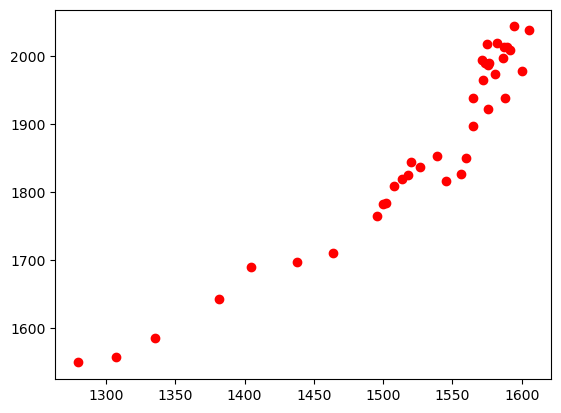

In [59]:
plt.plot(subset1["caba"] ,subset1["prov_BsAs"],"ro")

* por lo que estamos viendo y sabemos estan muy relacionados, va creciendo los dos y estan casi juntos a la par

percentil 75% - percentil 25% = rango intercuartil 

In [60]:
intercuartil_caba = 1579.496500 - 1503.385750
intercuartil_prov_BsAs = 1990.213750 - 1789.829000

print("intercuartil ingresos Caba =",intercuartil_caba, "intercuartil ingresos Pro_BsAs=", intercuartil_prov_BsAs)

intercuartil ingresos Caba = 76.11075000000005 intercuartil ingresos Pro_BsAs= 200.38474999999994


## Recta de REGRESION y PREDICCION para CABA Y PROV

* **Ye = a + b * x**
* caba = intercep + caba_smf * prov_bsas

In [61]:
x_mean = np.mean(subset1["caba"])
y_mean = np.mean(subset1["prov_BsAs"])
x_mean , y_mean

(1524.9209473684211, 1867.5776578947364)

In [62]:
import statsmodels.formula.api as smf

#Creamos un modelo lineal

lm =smf.ols(formula= "caba~prov_BsAs" , data = data).fit()
lm.params

Intercept    484.088908
prov_BsAs      0.557317
dtype: float64

In [63]:
intercepet1 = 484.088908
prov_bsas_dato  = 0.557317

el modelo predictivo seria Caba = 484.088908 + 0.557317 * Prov_BsAs
**ASI OBTENDRIAMOS LAS PREDICCIONES** que igual las imprimimos luego

In [64]:
#sacamos los P-valores
lm.pvalues

Intercept    1.150292e-09
prov_BsAs    3.281125e-19
dtype: float64

In [65]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   caba   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     307.2
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.28e-19
Time:                        17:23:56   Log-Likelihood:                -178.73
No. Observations:                  38   AIC:                             361.5
Df Residuals:                      36   BIC:                             364.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    484.0889     59.546      8.130      0.000     363.324     604.854
prov_BsAs      0.5573      0.032     17.528      0.000       0.493       0.622
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.262
Skew:                          -0.112   Prob(JB):                        0.877
Kurtosis:                       2.661   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#R2 ajustado
lm.rsquared_adj

0.8922059592366913

In [67]:
# de esta forma podremos predecir valors a futuros, predecir las ventas basadas en la ecuacion que teniamos
predicciones_fut = lm.predict(pd.DataFrame(subset1["prov_BsAs"]))
predicciones_fut.head()

0    1347.531164
1    1352.077196
2    1367.313117
3    1399.717734
4    1425.775629
dtype: float64

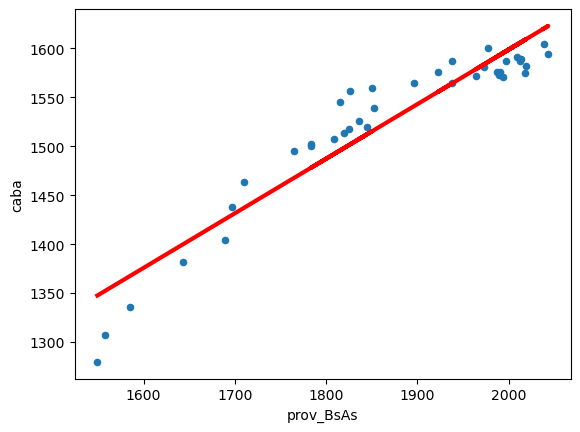

In [68]:
subset1.plot(kind = "scatter" , x="prov_BsAs", y="caba")
plt.plot(pd.DataFrame(subset1["prov_BsAs"]), predicciones_fut, c="red", linewidth=3)

**La línea roja es el modelo lineal que mejor se ajusta y que básicamente se ha obtenido en forma de modelo y los puntitos de color azul que estan dispersos alrededor del mismo son los datos originales que presentaba el Data Set.**

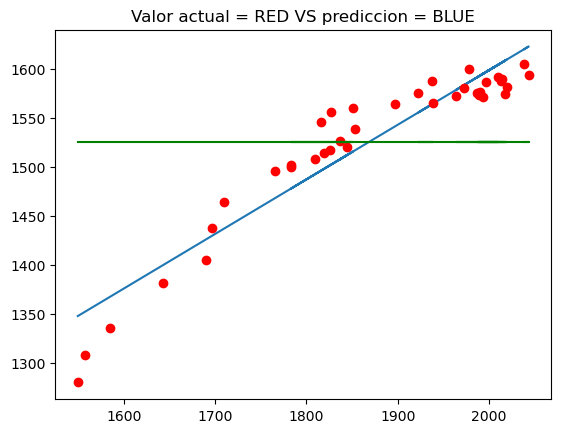

In [69]:
y_mean = [np.mean(subset1["caba"]) for i in range (1,len(subset1["prov_BsAs"])+1)]


plt.plot(subset1["prov_BsAs"], predicciones_fut) #LINEA AZUL
plt.plot(subset1["prov_BsAs"], subset1["caba"], "ro") #PUNTOS ROJOS (caba)
plt.title("Valor actual = RED VS prediccion = BLUE")
plt.plot(subset1["prov_BsAs"],y_mean,"g") #LINEA VERDE

In [70]:
subset1["prediccion"] = predicciones_fut

C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\1880775605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1["prediccion"] = predicciones_fut


* lo que podemos observar es que **LA LINEA AZUL ES LA PREDICCION LINEAL** 
* Los puntos **ROJOS SON LOS VALORES DE LA MUESTRA QUE TOMAMOS (valores actuales)** 
* observamos que estan bastante cercas los puntos entre si, solamente hay una separacion al principio de los puntos
* LA LINEA **VERDE SERIA EL PROMEDIO DE LOS VALORES ACTUALES**



* **SSD** (suma de los cuadrados de las diferencias) = **LAS DISTANCIA** de lo puntos rojos que estan fuera de la recta AZUL representan la variacion del modelo 


* **SST** (suma de los cuadrados totales) = **LA DISTANCIA** desde el punto rojo hasta el promedio (linea verde) representa la distancia del promedio 


* **SSR** (suma de los cuadrados de la regresion) = **LA DISTANCIA** entre la prediccion y el promedio. Es decir la diferencia que existe entre las rectas. (La recta de regresion (color azul) y la recta promedio (color verde))

* **LUEGO SACAREMOS EL ERROR ALEATORIOS** : la diferencia entre el valor actual y la prediccion

SSR:la diferencia explicada por el modelo | SSD:no esta explicada por el modelo y debe distribuirse aleatoriamente
SST:es el error total cometido (lo que importa es ssr sea valor grande y ssd valores pequeños)**la idea es que SSD se acerque al valor de SST** asi tiene poco margen de error la prediccion. para eso sacamos el **R2**.

**R2 = SSR / SST**  es buen indicador de si el modelo es bueno o malo (mas alto mejor)


**SST = SSR + SSD**

Ye = a + b * x


caba = intercep + caba_smf * prov_bsas

In [71]:
#diferencia entre el promedia y la regresion
subset1["SSR"] = (predicciones_fut - y_mean)**2 


#Diferencia entre los puntos originales del dataset y la regresion
subset1["SSD"] = (subset1["caba"] - predicciones_fut)**2

#Diferencia de cada punto con el valor promedio(recta verde)
subset1["SST"] = (subset1["caba"] - y_mean)**2

C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\1050299698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1["SSR"] = (predicciones_fut - y_mean)**2
C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\1050299698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1["SSD"] = (subset1["caba"] - predicciones_fut)**2
C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\1050299698.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [72]:
subset1.head()

,total_sector_privado,prov_BsAs,caba,santa_fe,cordoba,corr_BsAs_caba,corr_caba,corr_prov_BsAs,prediccion,SSR,SSD,SST
0,4937.920,1549.285,1279.692,417.937,387.987,78054.573451,60137.236627,101310.216070,1347.531164,31467.135239,4602.152174,60137.236627
1,5004.270,1557.442,1307.624,425.146,397.546,67391.531731,47217.963336,96184.126298,1352.077196,29874.962541,1976.086595,47217.963336
2,5077.027,1584.780,1335.681,429.355,403.891,53516.613896,35811.757680,79974.515311,1367.313117,24840.228228,1000.590819,35811.757680
3,5239.932,1642.924,1381.831,444.180,417.496,32145.680084,20474.733038,50469.266005,1399.717734,15675.844751,319.935237,20474.733038
4,5373.789,1689.680,1404.666,444.256,424.108,21393.073487,14461.252367,31647.576684,1425.775629,9829.794212,445.616424,14461.252367


In [73]:
SSR = sum(subset1["SSR"])
SSD = sum(subset1["SSD"])
SST = sum(subset1["SST"])

SSR , SSD , SST 

#SSD seria la parte que no explica el modelo que en este caso seria un 13%

(231170.36534345723, 27086.117702436914, 258256.48304589483)

In [74]:
SSR + SSD 

258256.48304589416

In [75]:
#SACAMOS EL R2
R2 = SSR/SST
R2

0.895119311689751

como vemos tiene un valor bastante alto, casi un 90% de una prediccion acertada

(array([1., 1., 2., 5., 8., 3., 6., 9., 0., 3.]),
 array([-67.83916401, -55.64058674, -43.44200947, -31.2434322 ,
        -19.04485493,  -6.84627765,   5.35229962,  17.55087689,
         29.74945416,  41.94803143,  54.1466087 ]),
 <BarContainer object of 10 artists>)

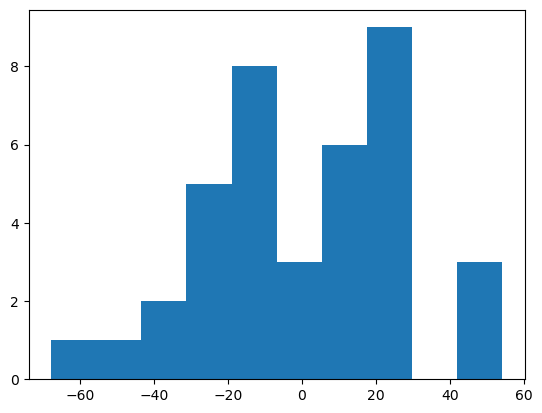

In [76]:
plt.hist(subset1["caba"] - predicciones_fut)

In [77]:
caba_mean = np.mean(data["caba"])
x_mean , caba_mean

(1524.9209473684211, 1524.9209473684211)

In [78]:
#Ye = a + b * x

In [79]:
subset1["RSE"] = (subset1["caba"] - predicciones_fut)**2
subset1.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_2980\3936360693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1["RSE"] = (subset1["caba"] - predicciones_fut)**2


,total_sector_privado,prov_BsAs,caba,santa_fe,cordoba,corr_BsAs_caba,corr_caba,corr_prov_BsAs,prediccion,SSR,SSD,SST,RSE
0,4937.920,1549.285,1279.692,417.937,387.987,78054.573451,60137.236627,101310.216070,1347.531164,31467.135239,4602.152174,60137.236627,4602.152174
1,5004.270,1557.442,1307.624,425.146,397.546,67391.531731,47217.963336,96184.126298,1352.077196,29874.962541,1976.086595,47217.963336,1976.086595
2,5077.027,1584.780,1335.681,429.355,403.891,53516.613896,35811.757680,79974.515311,1367.313117,24840.228228,1000.590819,35811.757680,1000.590819
3,5239.932,1642.924,1381.831,444.180,417.496,32145.680084,20474.733038,50469.266005,1399.717734,15675.844751,319.935237,20474.733038,319.935237
4,5373.789,1689.680,1404.666,444.256,424.108,21393.073487,14461.252367,31647.576684,1425.775629,9829.794212,445.616424,14461.252367,445.616424


**RSE** = Los errores estandar RESIDUALES


LUEGO TRATAREMOS DE SACAR LA **SSD** pero nos da igual


In [80]:
SSD1 = sum(subset1["RSE"])
SSD1 , SSD

(27086.117702436914, 27086.117702436914)

In [81]:
#SACAMOS LA DESVIACION TIPICA DE LOS RESIDUALES 
RSE = np.sqrt(SSD / (len(subset1)-2))

#SACAMOS EL PROMEDIO DE CABA, (ya lo tenemos)
caba_mean

#SACAMOS EL PROMEDIO QUE NO EXPLICA METODO 
error = RSE / caba_mean
error

0.017987665386666803

* nos da un 1,7% de ERROR, esto quiere decir que el modelo no queda explicado en un **1,79%**

---- 

* más pequeño sea cada uno de los P-valores de cada variable, mayor sera la significatividad de dicha variable y mayor será su aporte para el modelo.


* Si alguna de las variables tiene un **P-valor** terriblemente grande, podrá ser eliminada del modelo ya que indicará que no es un buen predictor del resultado del mismo.


* si empezamos con un modelo ,con una sola variable y decidímos incorporar una segunda o una tercera y así sucesivamente. Procuremos que esa incorporación que hacémos al modelo, por lo menos incremente el valor de **R2**  (r cuadrado).


* como parte del modelo,que también podría ser que el **P-valor** fuera alto pero el **R2_ajustado** se mantuviera o bajara drásticamente al ser eliminada si baja mucho el R2(rcuadrado ajustado). Tampoco conviene quitarla.

In [82]:
lm3 = smf.ols(formula = "caba~prov_BsAs+total_sector_privado+santa_fe", data=data).fit()
lm3.params

Intercept               411.187707
prov_BsAs                -1.611702
total_sector_privado      0.868134
santa_fe                 -2.138270
dtype: float64

In [83]:
lm3.rsquared_adj

0.957463911514766

aca vemos que tiene un mayor aumento de R2(eficacia del modelo) cuando agregamos **El sector privado**

In [84]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   caba   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     278.6
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           5.41e-24
Time:                        17:23:58   Log-Likelihood:                -159.98
No. Observations:                  38   AIC:                             328.0
Df Residuals:                      34   BIC:                             334.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              411.1877     73.611      5.586      0.000     261.593     560.783
prov_BsAs               -1.6117      0.292     -5.519      0.000      -2.205      -1.018
total_sector_privado     0.8681      0.119      7.296      0.000       0.626       1.110
santa_fe                -2.1383      0.766     -2.791      0.009      -3.695      -0.581
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.808
Skew:                          -0.133   Prob(JB):                        0.668
Kurtosis:                       2.337   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* si prestamos atencion los invervalos de confianza el mas bajos es de **santa fe**  -3.695, **coeficiente** tmb es el mas bajo **-2.1383** y como aclaramos antes el que tenga un **P-VALOR** muy alto es el que resta (en este caso todos tienen 0 menos Santa Fe que tiene 0.009

* cuando vemos un coeficiente en negativo quiere decir obviamente que no suma.en este caso podria ser asi ya que el sector privado triplica sus ganancias 

In [85]:
predic_final = lm3.predict(subset1[["prov_BsAs","total_sector_privado","santa_fe"]])
SSD = sum((subset1["caba"]- predic_final)**2) #suma de las diferencias de los cuadrados totales
RSE = np.sqrt(SSD / (len(subset1)-3-1))
RSE

17.230724141835758

In [86]:
RSE / caba_mean 

0.011299421239882024

Tenemos un ERROR del 1.12% 

## creamos una variable RANDOM para hacer un chequeo de entrenamiento y de testeo

(array([1., 2., 5., 5., 7., 5., 7., 5., 0., 1.]),
 array([-2.52127193, -2.04566209, -1.57005226, -1.09444243, -0.6188326 ,
        -0.14322277,  0.33238707,  0.8079969 ,  1.28360673,  1.75921656,
         2.2348264 ]),
 <BarContainer object of 10 artists>)

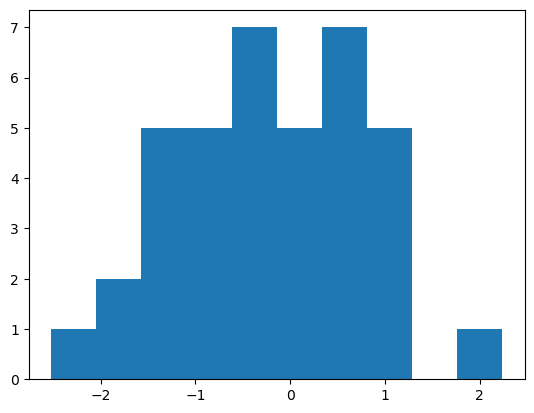

In [87]:
a = np.random.randn(len(data))
plt.hist(a)

In [88]:
# creamo una variable que diga que nos quedamos con el 80% ,luego aclaramos que es para entrenamiento y lo que sobra para testeo
check = (a<0.8)
training = data[check]
testing = data[~check]
len(training),len(testing)

(32, 6)

In [89]:
#creamos un modelo con el que mejor funcione caba y prov BsAs
lm = smf.ols(formula="caba~prov_BsAs+total_sector_privado", data=training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   caba   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.46e-20
Time:                        17:23:59   Log-Likelihood:                -136.51
No. Observations:                  32   AIC:                             279.0
Df Residuals:                      29   BIC:                             283.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              200.5508     57.891      3.464      0.002      82.150     318.952
prov_BsAs               -1.6975      0.326     -5.207      0.000      -2.364      -1.031
total_sector_privado     0.7557      0.109      6.962      0.000       0.534       0.978
==============================================================================
Omnibus:                        4.914   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                1.815
Skew:                          -0.111   Prob(JB):                        0.404
Kurtosis:                       1.855   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **Tenemos un R2 0.957 y un R_ajustado 0.954**
    * **R2 = 95.7% ----- R2_adj = 95.4%**
    
    
* **F-statics alto = 637.2 y un P-VALOR bajo = 0.00**


In [90]:
caba_pred = lm.predict(testing)
caba_pred

3     1371.421570
6     1466.520949
16    1497.997962
20    1543.035078
35    1615.733233
37    1644.577951
dtype: float64

* Sacamos el resultado de los cuadrados de la diferencia SSD = 2239.9463314130694
* ahora calculamos la desviacion standar de los residuos RSE =27.3248746957363

In [91]:
SSD = sum((testing["caba"] - caba_pred)**2)
RSE = np.sqrt(SSD / (len(testing)-2-1))

print(SSD,RSE)

3334.6609852119864 33.33997093186089


In [92]:
#sacamos la proporcion con el el promedio de las ventas y el testing
#creamos la variable con el promedio de caba(mean)

caba_meanTra = np.mean(testing["caba"])
error = RSE / caba_meanTra
error

0.0219231240710463

**Nos da un error muy bajo(lo que no explica el modelo) es un modelo mas que bueno = 2.19**


**es decir que va igual de bien el conjunto de testing al igual que el total. por lo visto el modelo que creamos no sufre ningun problema de hover fitting. sino que funciona bien en todo el dataset, no solamente en algunas partes, sino en GRAL (TODOS)**

la división en entrenamiento y testing al ser aleatoria podría darnos resultados diferentes, pero por lo visto va muy bien :D


In [93]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [94]:
feature_cols = ["caba","total_sector_privado","prov_BsAs"] 

x = data[feature_cols]

y = data["caba"] #variable a predecir

#creamos un estimador (SVR) indicando en el kernel que queremos crear y estimar un modelo lineal  
estimator = SVR(kernel="linear")

#creamos un selector con el stimador de arriba e indicamos con cuantas varibales predictivas nos quedamos, en este caso 2 
selector = RFE(estimator, n_features_to_select=2, step=1)

#hacemos otro selector para que cree el modelos con las X e Y que especificamos anteriormente
selector = selector.fit(x,y)

In [95]:
selector.support_ #Vemos cuales son las mejor variables predictoras para crear el modelo

array([ True, False,  True])

In [96]:
selector.ranking_ #pedimos un ranking de las mejores variables 

array([1, 2, 1])

## Recreamos la regresion lineal

In [97]:
from sklearn.linear_model import LinearRegression

x_pred = x[["caba","prov_BsAs"]]

#creamos una varibales para indicar que haga una regresion lineal con las variables predictoras 
lm = LinearRegression()
lm.fit(x_pred, y)

LinearRegression()

In [98]:
print("el eje donde se corta ALPHA =", lm.intercept_)
print("estos son los coeficientes", lm.coef_)
print("Aca predecimos el R2 del modelo creado", lm.score(x_pred,y))

el eje donde se corta ALPHA = 4.547473508864641e-13
estos son los coeficientes [ 1.00000000e+00 -6.96427048e-17]
Aca predecimos el R2 del modelo creado 1.0


vemos que el modelo tiene una prediccion de 100% perfecto (R2)